<div style="background-color: green;text-align:center;padding: 20px;font-size: 16px;color:white;">
Project-Title 
</div>
<div style="background-color: #303030;text-align:right;padding: 10px;font-size: 16px;color:white;">
Replica, Shreya, Sonu
</div>

#write about current scenario of diabetes, cause & effects of it, & factor affecting it

Cluster is defined as groups of data points such that data points in a group will be similar or related to one another and different from the data points of another group. And the process is known as clustering. The goal of clustering is to determine the intrinsic grouping in a set of unlabelled data. Clustering is a form of unsupervised learning since it doesn’t require labeled data.

<div style="background-color:blue;text-align:center;padding: 20px;font-size: 16px;color:white;">
KMEANS CLUSTERING
</div>

K- means is an unsupervised partitional clustering algorithm that is based on grouping data into k – numbers of clusters by determining centroid using the Euclidean or Manhattan method for distance calculation. It groups the object based on minimum distance.

<img src="https://aihubprojects.com/wp-content/uploads/2020/10/euclidean-distance-formula.png">
                                                                                             

# ALGORITHM

    1. First,  initialize the number of clusters, K (Elbow method is generally used in selecting the number of clusters )
    2. Randomly select the k data points for centroid. A centroid is the imaginary or real location representing the center of the cluster.
    3. Categorize each data items to its closest centroid and update the centroid coordinates calculating the average of items coordinates categorized in that group so far
    4. Repeat the process for a number of iterations till successive iterations clusters data items into the same group

# HOW IT WORKS ?

In the beginning, the algorithm chooses k centroids in the dataset randomly after shuffling the data. Then it calculates the distance of each point to each centroid using the euclidean distance calculation method. Each centroid assigned represents a cluster and the points are assigned to the closest cluster. At the end of the first iteration, the centroid values are recalculated, usually taking the arithmetic mean of all points in the cluster.  In every iteration, new centroid values are calculated until successive iterations provide the same centroid value. 

<div style="background-color:black;text-align:center;padding: 20px;font-size: 16px;color:white;">
LET's DIVE INTO CODE
</div>

# Prediction using Unsupervised ML
● #Describe how you are going to perform this project


# IMPORTING REQUIRED LIBRARIES

In [1]:
#importing required libraries & dataset for the project
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn import datasets

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# IMPORT DATASET & VISUALIZATION

In [2]:
data = pd.read_csv("./pima-data.csv")
data.head(10)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False
6,3,78,50,32,88,31.0,0.248,26,1.2608,True
7,10,115,0,0,0,35.3,0.134,29,0.0000,False
8,2,197,70,45,543,30.5,0.158,53,1.7730,True
9,8,125,96,0,0,0.0,0.232,54,0.0000,True


In [20]:
data.dtypes

num_preg          int64
glucose_conc      int64
diastolic_bp      int64
thickness         int64
insulin           int64
bmi             float64
diab_pred       float64
age               int64
skin            float64
diabetes          int64
dtype: object

In [21]:
data.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600,1.000000


In [23]:
data.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 60.1 KB


## #define heatmap in brief

<AxesSubplot:>

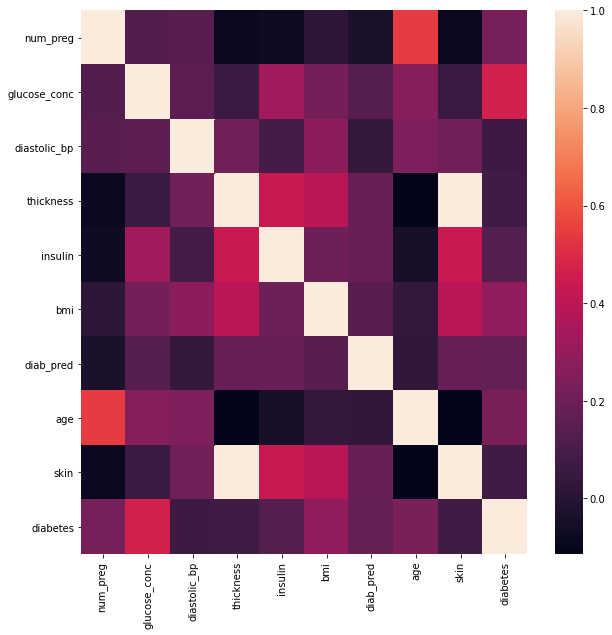

In [3]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr())

<div style="background-color: blue;text-align:center;padding: 20px;font-size: 16px;color:white;">
DATA PRE-PROCESSING
</div>

In [4]:
#visualize columns
data.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

# #Define what each column value means

## converting categorical to numerical data

In [5]:
cat_cols=[ 'diabetes']
le=preprocessing.LabelEncoder()
data[cat_cols]=data[cat_cols].apply(le.fit_transform)

data

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912,0
764,2,122,70,27,0,36.8,0.340,27,1.0638,0
765,5,121,72,23,112,26.2,0.245,30,0.9062,0
766,1,126,60,0,0,30.1,0.349,47,0.0000,1


<div style="background-color: red;text-align:center;padding: 20px;font-size: 16px;color:white;">
IMPORTANCE OF FEATURE/COLUMN DATA
</div>

In [6]:
#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split


#function to split dataset int training and test
def trainingData(df,n):
    X = data.iloc[:,n]
    y = data.iloc[:,-1:].values.T
    y=y[0]
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)
    return (X_train,X_test,y_train,y_test)

X_train,X_test,y_train,y_test=trainingData(data,list(range(len(list(data.columns))-1)))

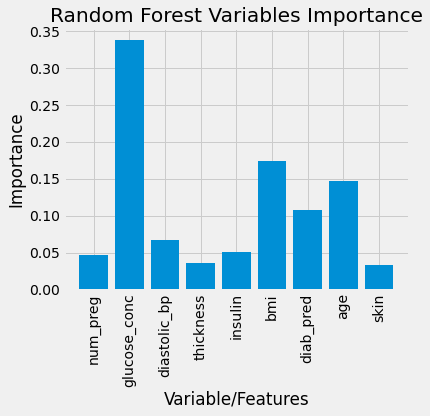

In [7]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=280,random_state=40, min_samples_leaf=4, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)

importances=RFR.feature_importances_
features=X_train.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.savefig('Random-Forest-Variables-Importances.jpg',dpi=800)
plt.show();

# #list top 4 important features for the model

## & Visualize some relation

# FINDING BEST K BY ELBOW METHOD

While working with the k-means clustering scratch, one thing we must keep in mind is the number of clusters ‘k’. We should make sure that we are choosing the optimum number of clusters for the given data set.  But, here arises a question, how to choose the optimum value of k ?? We use the elbow method which is generally used in analyzing the optimum value of k.

The Elbow method is based on the principle that “Sum of squares of distances of every data point from its corresponding cluster centroid should be as minimum as possible”. 

## STEPS OF CHOOSING BEST K VALUE

    1. Run k-means clustering model on various values of k 
    2. For each value of K, calculate the Sum of squares of distances of every data point from its corresponding cluster centroid which is called WCSS ( Within-Cluster Sums of Squares)
    3. Plot the value of WCSS with respect to various values of K
    4. To select the value of k, we choose the value where there is bend (knee) on the plot i.e. WCSS isn’t increasing rapidly.

## Since we need to cluster diabetes & Non Diabetes, cluster = 2 for our problem Scenario

<div style="background-color: green;text-align:center;padding: 20px;font-size: 16px;color:white;">
FITTING THE MODEL (K=2)- KMEANS CLUSTERING
</div>

In [37]:
X = data[['glucose_conc','bmi',  'age']]               
y = data['diabetes'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [38]:
import sklearn
from sklearn.cluster import KMeans
KMeans_Clustering = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering.fit(X)

KMeans(n_clusters=2, random_state=0)

In [50]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

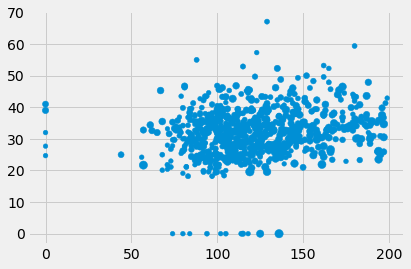

In [39]:
plt.scatter(X.glucose_conc, X.bmi, X.age)

<div style="background-color:orange;text-align:center;padding: 20px;font-size: 16px;color:black;">
VISUALIZING CLUSTERS
</div>

In [ ]:
plt.scatter(X.glucose_conc, X.bmi, X.age)

Text(0.5, 1.0, 'Actual Cluster')

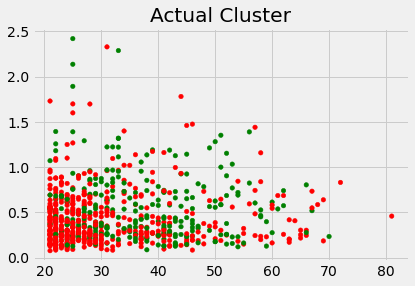

In [64]:
colormap=np.array(['Red','green','blue'])
plt.scatter(X.age, data.diab_pred,c=colormap[Y.values],s=20)
plt.title('Actual Cluster')
#num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
      # 'bmi', 'diab_pred', 'age', 'skin'

<div style="background-color:green;text-align:center;padding: 20px;font-size: 16px;color:white;">
CLUSTERING USING KMEANS
</div>

In [48]:
colormap=np.array(['blue','red'])
plt.scatter(X.glucose_conc, X.bmi,X.age,c=colormap[KMeans_Clustering.labels_],s=180)
plt.title('After K-means Clustering ')

TypeError: scatter() got multiple values for argument 's'

<div style="background-color:blue;text-align:center;padding: 20px;font-size: 16px;color:white;">MINOR PROJECT 2020
</div>